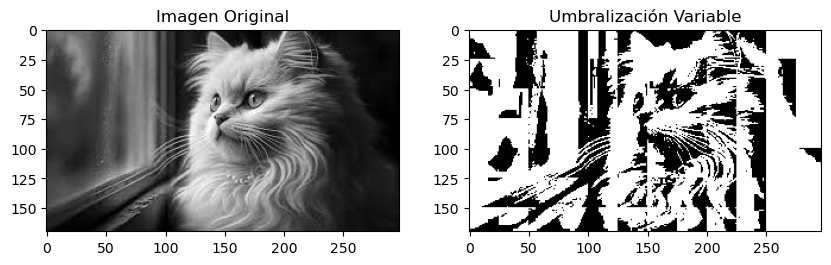

In [4]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Leer la imagen en escala de grises
imagen = cv2.imread('gatin.jfif', 0) 

# Función para calcular el umbral variable utilizando la técnica de partición
def umbral_variable(imagen, tamano_bloque, c_parametro):
    imagen_umbral = np.zeros_like(imagen)
    for y in range(0, imagen.shape[0], tamano_bloque):
        for x in range(0, imagen.shape[1], tamano_bloque):
            bloque = imagen[y:y+tamano_bloque, x:x+tamano_bloque]
            media_bloque = np.mean(bloque)
            umbral = media_bloque - c_parametro
            imagen_umbral[y:y+tamano_bloque, x:x+tamano_bloque] = (bloque > umbral) * 255
    return imagen_umbral

# Definir tamaño de bloque y parámetro de compensación
tamano_bloque = 25
c_parametro = 10

# Aplicar umbralización variable
imagen_umbral = umbral_variable(imagen, tamano_bloque, c_parametro)

# Mostrar la imagen original y la imagen umbralizada
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(imagen, cmap='gray')
plt.title('Imagen Original')
plt.subplot(1, 2, 2)
plt.imshow(imagen_umbral, cmap='gray')
plt.title('Umbralización Variable')
plt.show()


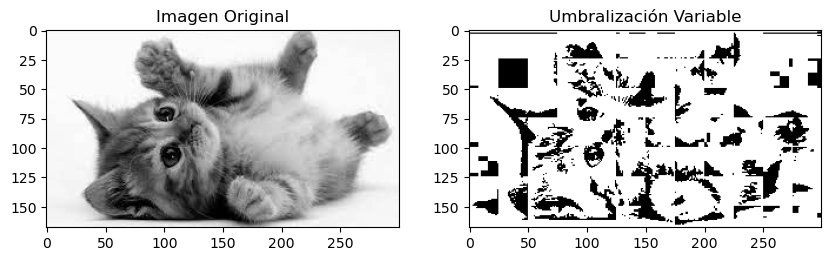

In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Leer la imagen en escala de grises
imagen = cv2.imread('gatito.jpg', 0) 

# Función para calcular el umbral variable utilizando la técnica de variables locales
def umbral_local(imagen, tamano_bloque, offset_umbral):
    imagen_umbral = np.zeros_like(imagen)
    for y in range(0, imagen.shape[0], tamano_bloque):
        for x in range(0, imagen.shape[1], tamano_bloque):
            bloque = imagen[y:y+tamano_bloque, x:x+tamano_bloque]
            media_bloque = np.mean(bloque)
            desviacion_bloque = np.std(bloque)
            umbral = media_bloque - (offset_umbral * desviacion_bloque)
            imagen_umbral[y:y+tamano_bloque, x:x+tamano_bloque] = (bloque > umbral) * 255
    return imagen_umbral

# Definir tamaño de bloque y offset de umbral
tamano_bloque = 25
offset_umbral = 0.8

# Aplicar umbralización variable
imagen_umbral = umbral_local(imagen, tamano_bloque, offset_umbral)

# Mostrar la imagen original y la imagen umbralizada
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(imagen, cmap='gray')
plt.title('Imagen Original')
plt.subplot(1, 2, 2)
plt.imshow(imagen_umbral, cmap='gray')
plt.title('Umbralización Variable')
plt.show()


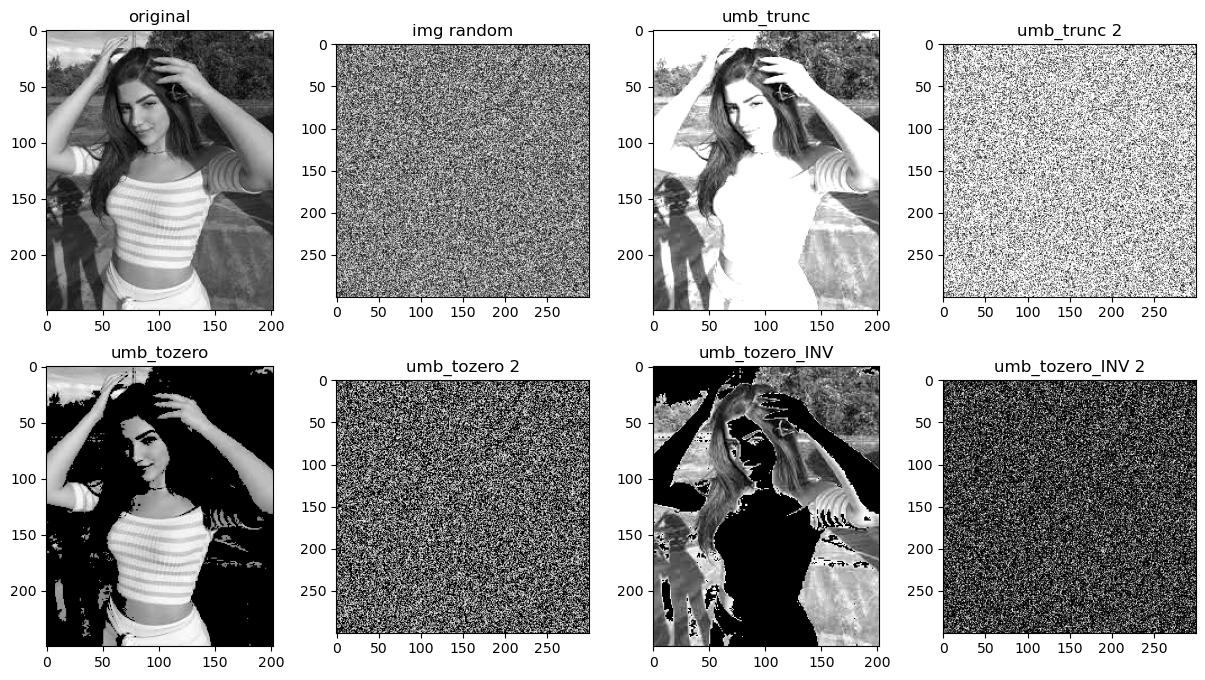

In [20]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


img =cv2.imread('girl1.jpg',0)
img2=np.random.randint(0,256,(300,300),dtype=np.uint8)

_,umb_trunc=cv2.threshold(img, 127,200,cv2.THRESH_TRUNC)
_,umb_trunc2=cv2.threshold(img2, 127,200,cv2.THRESH_TRUNC)


_,umb_tozero=cv2.threshold(img,127,255,cv2.THRESH_TOZERO)
_,umb_tozero2=cv2.threshold(img2,127,255,cv2.THRESH_TOZERO)


_,umb_tozero_INV=cv2.threshold(img,127,255,cv2.THRESH_TOZERO_INV)
_,umb_tozero_INV2=cv2.threshold(img2,127,255,cv2.THRESH_TOZERO_INV)


plt.figure(figsize=(15, 8))
plt.subplot(2,4,1)
plt.imshow(img,cmap='gray')
plt.title('original')

plt.subplot(2,4,2)
plt.imshow(img2,cmap='gray')
plt.title('img random')

plt.subplot(2,4,3)
plt.imshow(umb_trunc,cmap='gray')
plt.title('umb_trunc')

plt.subplot(2,4,4)
plt.imshow(umb_trunc2,cmap='gray')
plt.title('umb_trunc 2')

plt.subplot(2,4,5)
plt.imshow(umb_tozero,cmap='gray')
plt.title('umb_tozero')

plt.subplot(2,4,6)
plt.imshow(umb_tozero2,cmap='gray')
plt.title('umb_tozero 2')


plt.subplot(2,4,7)
plt.imshow(umb_tozero_INV,cmap='gray')
plt.title('umb_tozero_INV')

plt.subplot(2,4,8)
plt.imshow(umb_tozero_INV2,cmap='gray')
plt.title('umb_tozero_INV 2')

plt.show()



PRACTICA DE LABORATORIO 2 (UMBRALIZACION)    

	Genera una imagen en escala de grises (diferente a la generada en clase)
	(una imagen gradiante o lineal"investigacion")
    Aplica uno o más métodos de umbralización visto en clases para segmentar 
	la imagen y resaltar diferentes partes del gradiente.
    Cada una de estas aplicaciones debe estar en métodos distintos de tal
	manera que solo deberiamos llamar al nombre del metodo y a la imagen que queremos afectar 
	Visualiza la imagen original y las imágenes segmentadas resultantes tituladas 
	con los efectos ralizados correspondientemente .

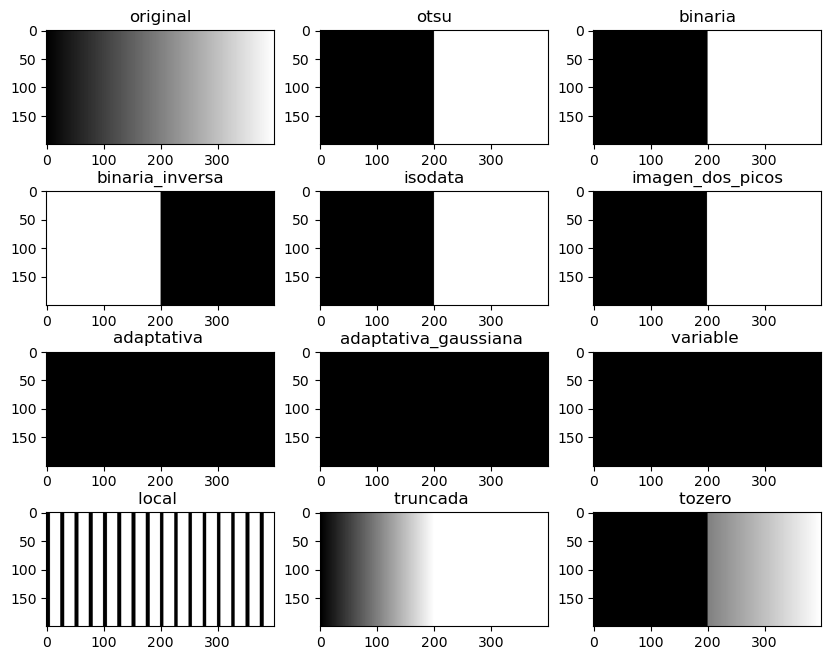

In [32]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Generar una imagen con un gradiente lineal
altura = 200
ancho = 400
imagen_gradiente = np.zeros((altura, ancho), dtype=np.uint8)
for y in range(altura):
    for x in range(ancho):
        imagen_gradiente[y, x] = int(255 * x / ancho)

# Método de umbralización Otsu
_, imagen_otsu = cv2.threshold(imagen_gradiente, 0, 255, cv2.THRESH_OTSU)

# Método de umbralización binaria
_, imagen_binaria = cv2.threshold(imagen_gradiente, 127, 255, cv2.THRESH_BINARY)

# Método de umbralización binaria inversa
_, imagen_binaria_inversa = cv2.threshold(imagen_gradiente, 127, 255, cv2.THRESH_BINARY_INV)

# Método de umbralización Isodata
_, imagen_isodata = cv2.threshold(imagen_gradiente, 0, 255, cv2.THRESH_OTSU + cv2.THRESH_BINARY)

# Método de umbralización de dos picos
_, imagen_dos_picos = cv2.threshold(imagen_gradiente, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

# Método de umbralización adaptativa
imagen_adaptativa = cv2.adaptiveThreshold(imagen_gradiente, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 11, 2)

# Método de umbralización adaptativa gaussiana
imagen_adaptativa_gaussiana = cv2.adaptiveThreshold(imagen_gradiente, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 11, 2)

# Método de umbralización variable
# Función para calcular el umbral variable utilizando la técnica de partición
def umbral_variable(imagen_gradiente, tamano_bloque, c_parametro):
    imagen_umbral = np.zeros_like(imagen_gradiente)
    for y in range(0, imagen_gradiente.shape[0], tamano_bloque):
        for x in range(0, imagen_gradiente.shape[1], tamano_bloque):
            bloque = imagen_gradiente[y:y+tamano_bloque, x:x+tamano_bloque]
            media_bloque = np.mean(bloque)
            umbral = media_bloque - c_parametro
            imagen_umbral[y:y+tamano_bloque, x:x+tamano_bloque] = (bloque > umbral) * 255
    return imagen_umbral

# Definir tamaño de bloque y parámetro de compensación
tamano_bloque = 25
c_parametro = 10

# Aplicar umbralización variable
imagen_umbral_variable = umbral_variable(imagen_gradiente, tamano_bloque, c_parametro)



# Método de umbralización truncada
_, imagen_truncada = cv2.threshold(imagen_gradiente, 127, 255, cv2.THRESH_TRUNC)

# Método de umbralización a cero
_, imagen_tozero = cv2.threshold(imagen_gradiente, 127, 255, cv2.THRESH_TOZERO)

# Método de umbralización local utilizando la técnica de variables locales
def umbralizacion_local(imagen_gradiente, block_size, threshold_offset):
    threshold_image = np.zeros_like(imagen_gradiente)
    for y in range(0, imagen_gradiente.shape[0], block_size):
        for x in range(0, imagen_gradiente.shape[1], block_size):
            block = imagen_gradiente[y:y+block_size, x:x+block_size]
            block_mean = np.mean(block)
            block_std = np.std(block)
            threshold = block_mean - (threshold_offset * block_std)
            threshold_image[y:y+block_size, x:x+block_size] = (block > threshold) * 255
    return threshold_image

# Parámetros para umbralización local
block_size_local = 25
threshold_offset_local = 0.8

# Aplicar umbralización local
imagen_local = umbralizacion_local(imagen_gradiente, block_size_local, threshold_offset_local)

# Visualizacion 

plt.figure(figsize=(10, 8))
plt.subplot(4,3,1)
plt.imshow(imagen_gradiente,cmap='gray')
plt.title('original')


plt.subplot(4,3,2)
plt.imshow(imagen_otsu,cmap='gray')
plt.title('otsu')

plt.subplot(4,3,3)
plt.imshow(imagen_binaria,cmap='gray')
plt.title('binaria')

plt.subplot(4,3,4)
plt.imshow(imagen_binaria_inversa,cmap='gray')
plt.title('binaria_inversa')


plt.subplot(4,3,5)
plt.imshow(imagen_isodata,cmap='gray')
plt.title('isodata')

plt.subplot(4,3,6)
plt.imshow(imagen_dos_picos,cmap='gray')
plt.title('imagen_dos_picos')

plt.subplot(4,3,7)
plt.imshow(imagen_adaptativa ,cmap='gray')
plt.title('adaptativa ')


plt.subplot(4,3,8)
plt.imshow(imagen_adaptativa_gaussiana ,cmap='gray')
plt.title('adaptativa_gaussiana ')

plt.subplot(4,3,9)
plt.imshow(imagen_umbral_variable ,cmap='gray')
plt.title('variable ')

plt.subplot(4,3,10)
plt.imshow(imagen_local ,cmap='gray')
plt.title('local ')

plt.subplot(4,3,11)
plt.imshow(imagen_truncada ,cmap='gray')
plt.title('truncada ')


plt.subplot(4,3,12)
plt.imshow(imagen_tozero ,cmap='gray')
plt.title('tozero ')


plt.show()
